## Problem Statement

After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.
Follow the complete life cycle of data science. Include all the steps like.
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model

In [1]:
#importing required lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read the dataset
dataset = pd.read_csv("Olx_Car_Dataset.csv",index_col=0,na_values="-")
dataset.head()

,Brand,Model,Variant,Year,driven kilometers,fuel,Transmission,number of owners,location,Price
0,Ford,Figo,2010-2012 Diesel ZXI,2010,"90,000 km",Diesel,Manual,2nd,"Ram Krishna Nagar, Vijayawada, Andhra Pradesh","₹ 2,15,000"
1,Ford,Ecosport,1.5 Petrol Ambiente,2015,"38,000 km",Petrol,Manual,1st,"Phule Nagar, Pune, Maharashtra","₹ 5,75,000"
2,Maruti Suzuki,Wagon R,2006-2010 VXI Minor,2009,"58,720 km",Petrol,Manual,1st,"Manuti, Thrissur, Kerala","₹ 2,45,000"
3,Hyundai,Fluidic Verna,1.6 CRDi SX,2018,"55,000 km",Diesel,Manual,1st,"Usmanpura, Ahmedabad, Gujarat","₹ 9,49,999"
4,Maruti Suzuki,Swift Dzire,VXI,2015,"57,091 km",Petrol,Manual,2nd,"Ezhamkulam, Adoor, Kerala","₹ 4,95,000"


In [3]:
# Copying dataset
data = dataset.copy()

In [4]:
data.shape

(492, 10)

In [5]:
data.isnull().sum()

Brand                24
Model                26
Variant              26
Year                 27
driven kilometers    43
fuel                 30
Transmission         37
number of owners     69
location             13
Price                13
dtype: int64

In [6]:
# Checking unique values
col = data.columns

for i in col:
    print(data[i].value_counts())
    print("--------------------------------------")

Maruti Suzuki      125
Hyundai             88
Mahindra            34
Toyota              33
Ford                25
Honda               24
Tata                22
Chevrolet           15
Volkswagen          15
BMW                 13
Skoda               11
Audi                11
Renault             10
Mercedes-Benz        7
Datsun               5
Nissan               4
Volvo                3
Jeep                 3
Fiat                 3
Mitsubishi           2
Other Brands         2
For Sale             2
iPhone               2
Land Rover           2
Bentley              1
Jaguar               1
Ambassador           1
Houses & Villas      1
MG                   1
Bajaj                1
Kia                  1
Name: Brand, dtype: int64
--------------------------------------
Swift          20
Swift Dzire    18
i10            16
Wagon R        14
City           14
               ..
Optra           1
V40             1
Fiesta          1
S Cross         1
Tigor           1
Name: Model, Length: 136

#### Observation :

1. We have a null values in dataset
2. some of the rows misaligned.

In [7]:
data.dtypes

Brand                object
Model                object
Variant              object
Year                 object
driven kilometers    object
fuel                 object
Transmission         object
number of owners     object
location             object
Price                object
dtype: object

In [10]:
data['Year'] = data['Year'].apply(casting)

In [9]:
def casting(x):
    try:
        return int(x)
    except:
        return 0

In [11]:
data['driven kilometers'] = data['driven kilometers'].str.replace("km"," ").str.strip().str.replace(",","").str.strip()
data['driven kilometers'] = data['driven kilometers'].apply(casting)

In [12]:
def unknown(value):
    fuel = ['Diesel','Petrol','CNG & Hybrids','Manual','LPG']
    if value in fuel:
        return value
    return "Unknown"

In [13]:
data['fuel'] = data['fuel'].apply(unknown)

In [14]:
def unknown_trans(value):
    trans = ['Manual','Automatic']
    if value in trans:
        return value
    return "Unknown"

In [15]:
data['Transmission'] = data['Transmission'].apply(unknown_trans)

In [17]:
location = data['location'].str.split(",",expand=True)

In [18]:
# Created dataframe for location column
location = location.rename({0:"Street",1:"District",2:"State"},axis=1)

In [19]:
data['Price'] = data['Price'].str.replace("₹","").str.replace(",","").str.strip().astype(float)

In [20]:
data_new = pd.concat([data,location],axis=1)

In [21]:
data_new.head()

,Brand,Model,Variant,Year,driven kilometers,fuel,Transmission,number of owners,location,Price,Street,District,State
0,Ford,Figo,2010-2012 Diesel ZXI,2010,90000,Diesel,Manual,2nd,"Ram Krishna Nagar, Vijayawada, Andhra Pradesh",215000.0,Ram Krishna Nagar,Vijayawada,Andhra Pradesh
1,Ford,Ecosport,1.5 Petrol Ambiente,2015,38000,Petrol,Manual,1st,"Phule Nagar, Pune, Maharashtra",575000.0,Phule Nagar,Pune,Maharashtra
2,Maruti Suzuki,Wagon R,2006-2010 VXI Minor,2009,58720,Petrol,Manual,1st,"Manuti, Thrissur, Kerala",245000.0,Manuti,Thrissur,Kerala
3,Hyundai,Fluidic Verna,1.6 CRDi SX,2018,55000,Diesel,Manual,1st,"Usmanpura, Ahmedabad, Gujarat",949999.0,Usmanpura,Ahmedabad,Gujarat
4,Maruti Suzuki,Swift Dzire,VXI,2015,57091,Petrol,Manual,2nd,"Ezhamkulam, Adoor, Kerala",495000.0,Ezhamkulam,Adoor,Kerala


In [22]:
data_new.drop('location',axis=1,inplace=True)

In [23]:
## Saving cleaned data
data_new.to_csv("car_data_Clean.csv")

### Checking null values

In [24]:
data_new.isnull().sum()

Brand                24
Model                26
Variant              26
Year                  0
driven kilometers     0
fuel                  0
Transmission          0
number of owners     69
Price                13
Street               13
District             13
State                13
dtype: int64

**Observation :**
    
    Null value present in data we need to handle that.

In [25]:
### Statistical summary:
data_new.describe()

,Year,driven kilometers,Price
count,492.000000,492.000000,4.790000e+02
mean,1824.943089,60990.656504,6.809547e+05
std,586.475684,51163.720033,1.650273e+06
min,0.000000,0.000000,2.500000e+02
25%,2009.000000,35000.000000,2.450000e+05
50%,2013.000000,60000.000000,4.250000e+05
75%,2016.000000,80464.750000,7.000000e+05
max,2021.000000,780000.000000,3.200000e+07


### Checking distribution of the data

<AxesSubplot:xlabel='driven kilometers', ylabel='Count'>

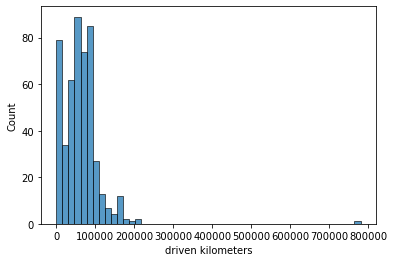

In [27]:
sns.histplot(data_new['driven kilometers'],bins=50)

C:\Users\SIVA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

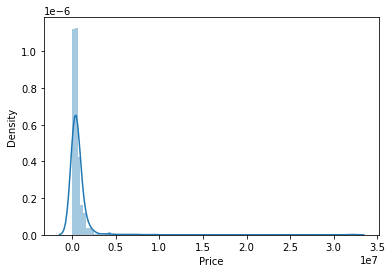

In [28]:
sns.distplot(data_new['Price'],bins=100)

<AxesSubplot:xlabel='driven kilometers', ylabel='Price'>

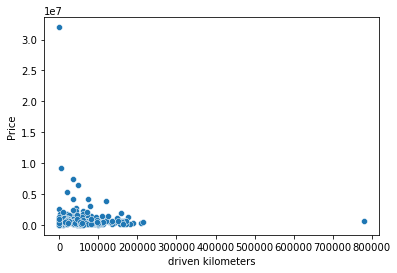

In [29]:
# relation between km and price

sns.scatterplot(data=data,x='driven kilometers',y='Price')

In [30]:
# We can clearly observe if km increse price will be decrese

In [31]:
data_new.groupby(['fuel']).mean()['Price'].sort_values()

fuel
LPG              1.366667e+05
CNG & Hybrids    2.249000e+05
Manual           4.833000e+05
Petrol           4.940538e+05
Diesel           7.881108e+05
Unknown          1.357227e+06
Name: Price, dtype: float64

We can observe some insights from the above data

Diesel car price more cost comparing all other fuels

<AxesSubplot:xlabel='Transmission'>

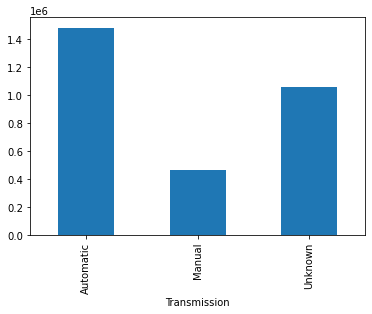

In [32]:
data_new.groupby(['Transmission']).mean()['Price'].plot(kind='bar')

In [ ]:
# Automatic car price is more

<AxesSubplot:xlabel='Year'>

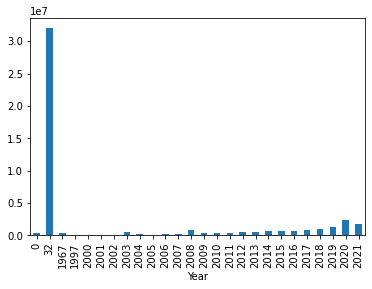

In [33]:
data_new.groupby(['Year']).mean()['Price'].plot(kind='bar')

if latest car price will be more and old car price less.

### Feature Engineering

- Handle null value

- Remove outlier

- corr

- Label encoding 

- scaling the data

In [34]:
from sklearn.impute import SimpleImputer

In [37]:
imputer = SimpleImputer(strategy="constant",fill_value='Missing')
data_new['Brand'] = imputer.fit_transform(data_new['Brand'].values.reshape(-1, 1))

In [44]:
cat_list = ['Model','Variant','Street','District','State']

for i in cat_list:
    data_new[i] = imputer.fit_transform(data_new[i].values.reshape(-1, 1))

In [46]:
imputer = SimpleImputer(strategy="most_frequent")
data_new['number of owners'] = imputer.fit_transform(data_new['number of owners'].values.reshape(-1, 1))

In [47]:
imputer = SimpleImputer(strategy="mean")
data_new['Price'] = imputer.fit_transform(data_new['Price'].values.reshape(-1, 1))

In [49]:
### All null values is handled as per the type of column

In [48]:
data_new.isna().sum()

Brand                0
Model                0
Variant              0
Year                 0
driven kilometers    0
fuel                 0
Transmission         0
number of owners     0
Price                0
Street               0
District             0
State                0
dtype: int64

## Lable Encoding the string variables

In [60]:
cat_col = data_new.select_dtypes("object").columns.values

In [62]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [63]:
for i in cat_col:
    data_new[i] = label.fit_transform(data_new[i])
    
data_new.head()

,Brand,Model,Variant,Year,driven kilometers,fuel,Transmission,number of owners,Price,Street,District,State
0,9,52,127,2010,90000,1,1,1,215000.0,212,122,0
1,9,41,46,2015,38000,4,1,0,575000.0,194,93,14
2,19,120,105,2009,58720,4,1,0,245000.0,158,113,12
3,12,53,55,2018,55000,1,1,0,949999.0,294,2,6
4,19,113,314,2015,57091,4,1,1,495000.0,73,0,12


### Spliting variable for traning and testing

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [68]:
X= data_new.drop(columns=['Price'],axis=1)
y = data_new['Price']

In [71]:
# Standarder Scaling
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(X)

StandardScaler()

In [77]:
maxScore = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_test = lr.predict(x_test)
    score = r2_score(y_test,pred_test)
    if score > maxScore:
        maxScore = score
        maxRS = i
        
print(f"Best random state :{i} and Test r2 score:{maxScore}")

Best random state :99 and Test r2 score:0.13711429769606798


In [78]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=99)

In [79]:
## Performance of model
def performance(actual,prec):
    print("error")
    print("Mean absolute error",mean_absolute_error(actual,prec))
    print("mean square error",mean_squared_error(actual,prec))
    print("R2 Score :",r2_score(actual,prec))

In [80]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train,y_train)
prec =lr.predict(x_test)
performance(y_test,prec)

error
Mean absolute error 466039.9059619074
mean square error 927441789732.2208
R2 Score : -0.007150095443355209


In [81]:
# Cross validation
from sklearn.model_selection import cross_val_score

In [83]:
cross_ls = cross_val_score(LinearRegression(),X,y,cv=10)
cross_ls.mean()

0.0022781889719178496

In [88]:
### Regularation Process
from sklearn.linear_model import Lasso

In [85]:
# Lasso Regrssion
le =Lasso(alpha=0.0001)
le.fit(x_train,y_train)
predict = le.predict(x_test)

performance(y_test,predict)

error
Mean absolute error 466039.90595356515
mean square error 927441789730.3647
R2 Score : -0.007150095441339488


In [87]:
cross_Val = cross_val_score(le,X,y,cv=10)
cross_Val.mean()

0.002278189086679061

### Saving the model

In [90]:
import joblib

In [91]:
Model_1 = joblib.dump(lr,"Car_Price.obj")